In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [132]:
data = pd.read_csv('communities.csv', header=None, na_values=['?'])
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [133]:
#Треба підготувати датасет для створення моделі

<AxesSubplot:>

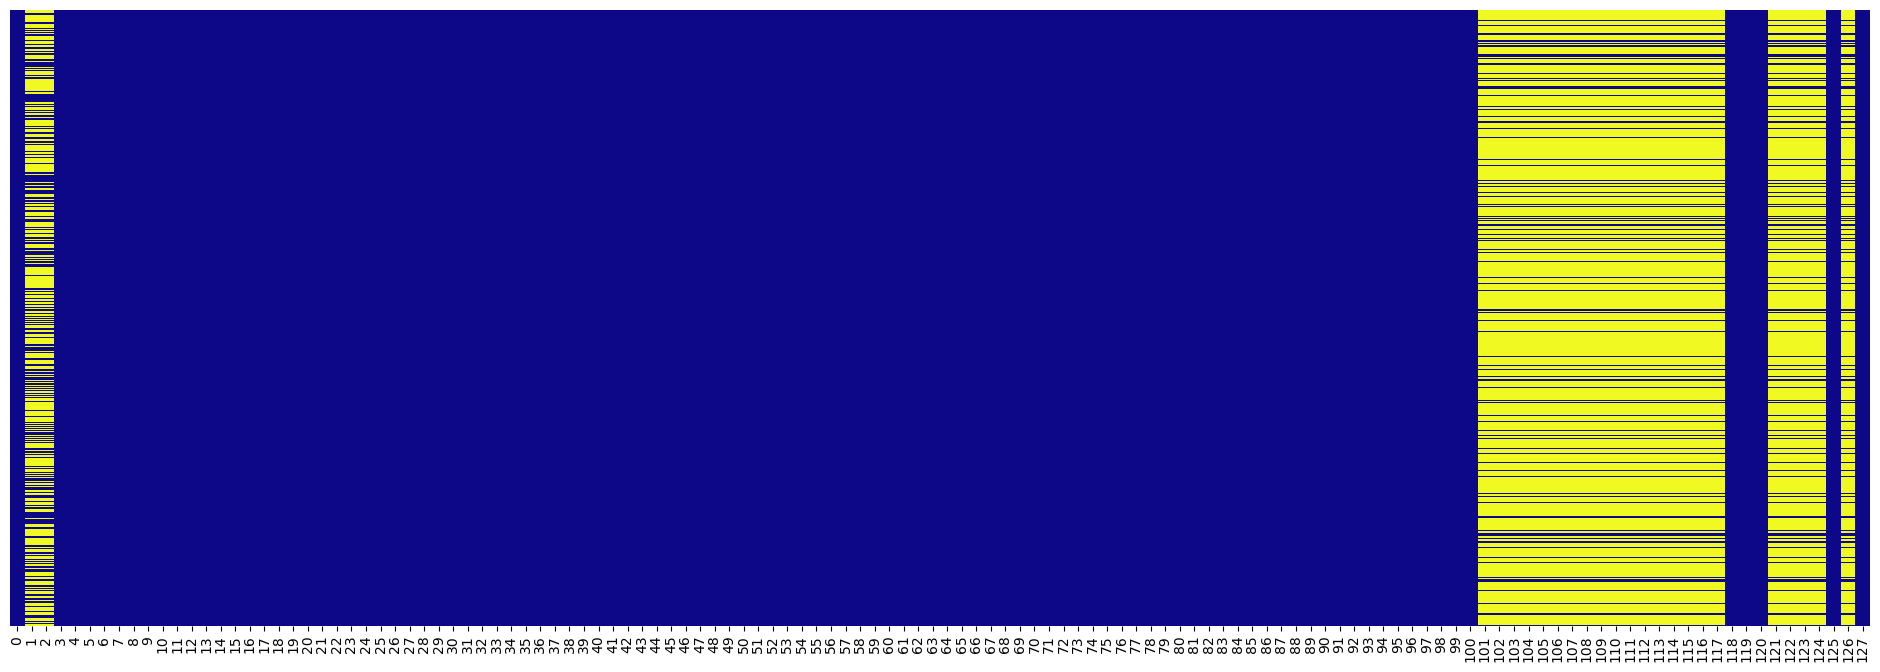

In [134]:
#робимо хітмап щоб побачити де не вистачає даних
plt.figure(figsize=(24, 8))
sns.heatmap(data.isnull(),yticklabels=False, cmap='plasma', cbar=False)

In [135]:
#Прибираємо стовпці з 1 по 5, які не будемо застосовувати, а також  видаляємо рядки з пропущеними даними.
data.drop([0,1,2,3,4], axis=1, inplace=True)
data.dropna(inplace=True)

<AxesSubplot:>

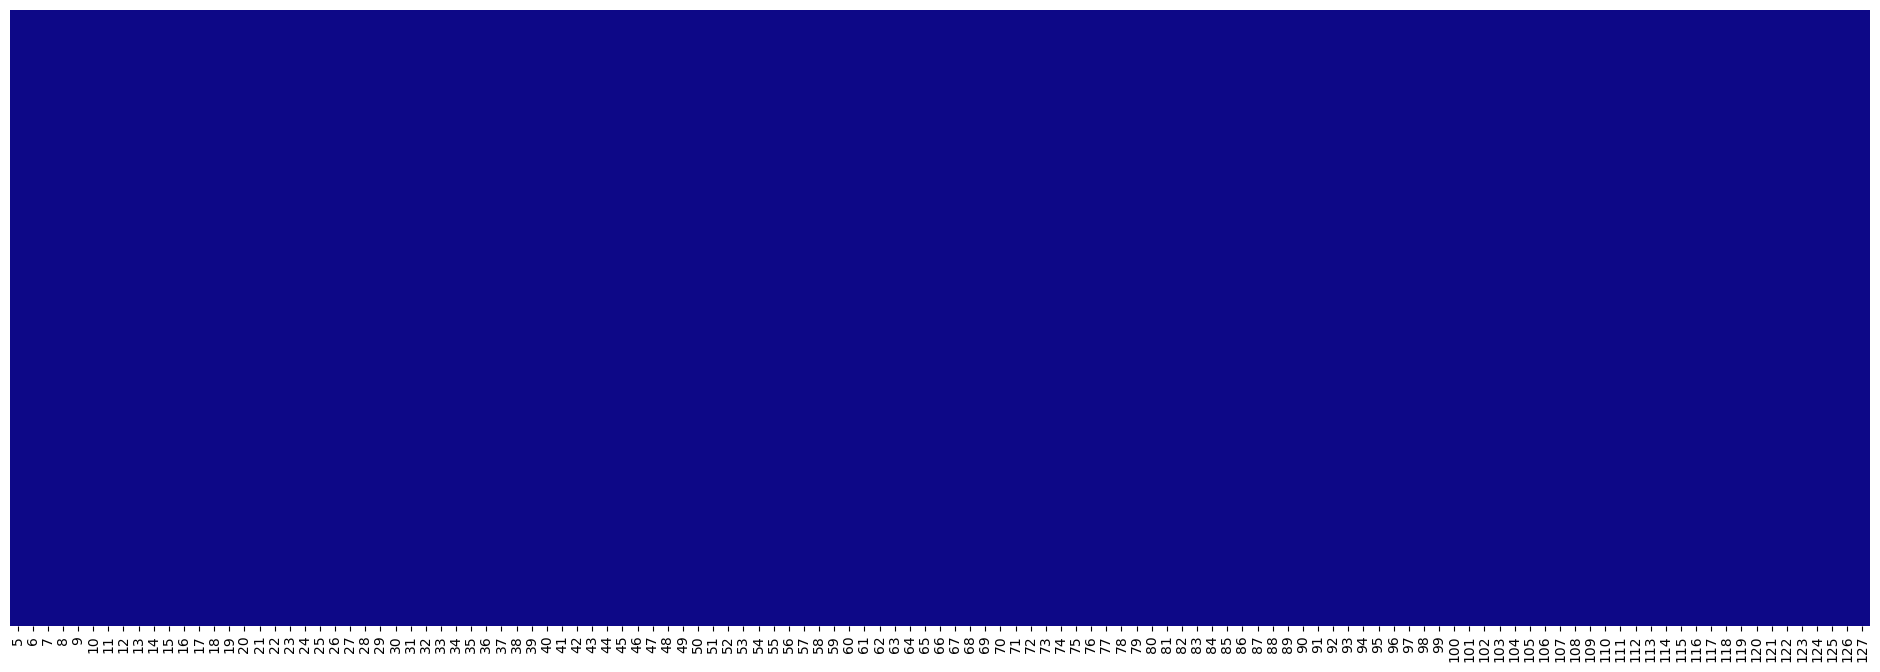

In [136]:
#Будуэмо заново хітмап щоб оцінити результат, чи залишились пропущені значення
plt.figure(figsize=(24, 8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='plasma')

In [137]:
#Присвоюємо X та y для створення моделі
X = data.drop(127, axis=1)
y = data[127]

# Розділяємо модель на трейн та тест
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

In [138]:
#Тут ми перевіряємо який параметр альфа нам підходить найкраще для гребеневої регресії і підставляємо в наступний код
alphas = [0.1, 1, 10, 100]
ridgecv = RidgeCV(alphas=alphas, cv=5)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

10.0

In [139]:
#Робимо гребеневу регресію з показником альфа=10 та виводимо показники
ridgereg = Ridge(alpha=ridgecv.alpha_)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

print("R-Square Value (Ridge)",r2_score(y_test,y_pred))
print ("mean_absolute_error (Ridge) :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error (Ridge) : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error (Ridge) : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value (Ridge) 0.5442422344114584
mean_absolute_error (Ridge) : 0.13277523657131599
mean_squared_error (Ridge) :  0.028302512735454134
root_mean_squared_error (Ridge) :  0.1682335065777746


In [146]:
#Перевіряємо який параметр альфа нам підходить найкраще для ласо регресії і підставляємо в наступний код
lassoregcv = LassoCV(n_alphas=70, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006192779662534953, tolerance: 0.0014395706179775281
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00585876491137749, tolerance: 0.0014395706179775281
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010345749713573937, tolerance: 0.0014395706179775281
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective 

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010904864881303489, tolerance: 0.0015043519553072629
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015950450620310086, tolerance: 0.0015043519553072629
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00803729616882376, tolerance: 0.0015043519553072629
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective

0.0016225973248853132

In [141]:
#Робимо лассо регуляризацію з отриманою альфа 0.0016
lassoreg = Lasso(alpha=lassoregcv.alpha_, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [147]:
#виводимо показники оцінки якості моделі (лассо регресії)
print("R-Square Value (lasso)",r2_score(y_test,y_pred))
print ("mean_absolute_error (lasso) :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error (lasso) : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error (lasso) : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value (lasso) 0.5505334850688206
mean_absolute_error (lasso) : 0.13410907085850202
mean_squared_error (lasso) :  0.02791182668401189
root_mean_squared_error (lasso) :  0.16706832938654737


In [148]:
'''
Отже, по показниками оцінки якості моделі ми бачимо що вони майже однакові, і в даній задачі можна застосовувати як гребеневу
регуляризацію, так і ласо. Але все одно середній результат коеф. детермінації не занадто високий, що свідчить про
модель має досить середній показник точності прогнозування моделі.
'''

'\nОтже, по показниками оцінки якості моделі ми бачимо що вони майже однакові, і в даній задачі можна застосовувати як гребеневу\nрегуляризацію, так і ласо. Але все одно середній результат коеф. детермінації не занадто високий.\n'